<a href="https://colab.research.google.com/github/vldrud/for_rodin/blob/master/vladyslav_rud_test_task_mindcraft_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### mindcraft.ai

мера жаккара - это мера, основанная на использовании информации о множестве общих символов. Считается она как отношение количества уникальных символов в двух множествах (букв в словах) к общему числу уникальных символов в двух множествах (словах).
Например собака - сабака. Число уникальных символов в обеих строках- 5, общее число уникальных символов - 4.  Следовательно, в процентном соотношении мера сходства составляет 80%. Вполне удовлетворительно.
Формула вычисления меры Жаккара выглядит так, где числитель - общее число уникальных символов, а знаменатель - число уникальных символов в обеих строках

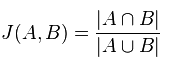

In [26]:
#import the libraries
import os

import numpy as np
import pandas as pd


In [27]:
pd_data = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv')
pd_data

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI
...,...,...,...,...,...,...,...,...,...,...
123,39,31,12,"""N""",119,48,35,"""W""","""Reno""",NV
124,50,25,11,"""N""",104,39,0,"""W""","""Regina""",SA
125,40,10,48,"""N""",122,14,23,"""W""","""Red Bluff""",CA
126,40,19,48,"""N""",75,55,48,"""W""","""Reading""",PA


In [28]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LatD      128 non-null    int64 
 1    "LatM"   128 non-null    int64 
 2    "LatS"   128 non-null    int64 
 3    "NS"     128 non-null    object
 4    "LonD"   128 non-null    int64 
 5    "LonM"   128 non-null    int64 
 6    "LonS"   128 non-null    int64 
 7    "EW"     128 non-null    object
 8    "City"   128 non-null    object
 9    "State"  128 non-null    object
dtypes: int64(6), object(4)
memory usage: 10.1+ KB


Let's go to the 'City' column

In [29]:
df = pd_data[' "City"'].convert_dtypes()
df

0            "Youngstown"
1               "Yankton"
2                "Yakima"
3             "Worcester"
4       "Wisconsin Dells"
              ...        
123                "Reno"
124              "Regina"
125           "Red Bluff"
126             "Reading"
127             "Ravenna"
Name:  "City", Length: 128, dtype: string

In [30]:
# convert to lower case the values
# deleting space at the forward of string
df = df.apply(str.lower)
df = df.apply(str.lstrip)
df

0           "youngstown"
1              "yankton"
2               "yakima"
3            "worcester"
4      "wisconsin dells"
             ...        
123               "reno"
124             "regina"
125          "red bluff"
126            "reading"
127            "ravenna"
Name:  "City", Length: 128, dtype: object

Convert a string values to set and print the example of operations in sets: intersection and union

In [31]:
# converting to set which contain only unique values
df_set = df.apply(set)

# and to numpy
df_set.to_numpy()

# printing the example
print(df_set[0], df_set[1])
print('union: ', df_set[0].union(df_set[1]), ' len: ', len(df_set[0].union(df_set[1])))
print('intersection: ', df_set[0].intersection(df_set[1]), ' len: ', len(df_set[0].intersection(df_set[1])))

#iteritems_df = list(df_set_1.iteritems())
#print(iteritems_df)

{'s', 'g', 'n', 'w', 'u', 'y', 'o', 't', '"'} {'k', 'n', 'y', 'a', 'o', 't', '"'}
union:  {'k', 's', 'g', 'n', 'w', 'u', 'y', 'a', 'o', 't', '"'}  len:  11
intersection:  {'n', 'y', 'o', 't', '"'}  len:  5


In [32]:
# creating the tables which contain the shape of union and interfection
union_set = np.zeros((df.shape[0], df.shape[0]), dtype='int64')
intersection_set = np.zeros((df.shape[0], df.shape[0]))


# filling the tables of union and intersection values
for i in range(union_set.shape[0]):
    for j in range(union_set.shape[0]):
        union_set[i][j] = len(df_set[i].union(df_set[j]))
        intersection_set[i][j] = len(df_set[i].intersection(df_set[j]))
        
# the matrix of jakkar distance
jakkar_distance = intersection_set / union_set
jakkar_distance = pd.DataFrame(jakkar_distance, index=df.values, columns=df.values)
jakkar_distance
#print(jakkar_distance.shape)

,"""youngstown""","""yankton""","""yakima""","""worcester""","""wisconsin dells""","""winston-salem""","""winnipeg""","""winchester""","""wilmington""","""wilmington""","""williston""","""williamsport""","""williamson""","""wichita falls""","""wichita""","""wheeling""","""west palm beach""","""wenatchee""","""weed""","""waycross""","""wausau""","""waukegan""","""watertown""","""watertown""","""waterloo""","""waterbury""","""washington""","""warren""","""walla walla""","""waco""","""vincennes""","""victoria""","""vicksburg""","""vancouver""","""valley city""","""valdosta""","""utica""","""uniontown""","""tyler""","""twin falls""",...,"""santa ana""","""san jose""","""san francisco""","""sandusky""","""san diego""","""san bernardino""","""san antonio""","""san angelo""","""salt lake city""","""salisbury""","""salinas""","""salina""","""salida""","""salem""","""saint paul""","""saint louis""","""saint joseph""","""saint joseph""","""saint johnsbury""","""saint cloud""","""saint augustine""","""saginaw""","""sacramento""","""rutland""","""roswell""","""rocky mount""","""rock springs""","""rockford""","""rochester""","""rochester""","""roanoke""","""richmond""","""richmond""","""richfield""","""rhinelander""","""reno""","""regina""","""red bluff""","""reading""","""ravenna"""
"""youngstown""",1.000000,0.454545,0.153846,0.416667,0.333333,0.400000,0.333333,0.357143,0.500000,0.500000,0.545455,0.333333,0.384615,0.250000,0.230769,0.307692,0.222222,0.307692,0.181818,0.416667,0.400000,0.416667,0.416667,0.416667,0.307692,0.384615,0.583333,0.250000,0.166667,0.272727,0.230769,0.214286,0.266667,0.285714,0.187500,0.307692,0.250000,0.600000,0.250000,0.357143,...,0.363636,0.307692,0.266667,0.416667,0.357143,0.250000,0.416667,0.384615,0.250000,0.285714,0.250000,0.250000,0.153846,0.153846,0.357143,0.461538,0.312500,0.312500,0.437500,0.400000,0.461538,0.454545,0.357143,0.307692,0.333333,0.428571,0.333333,0.142857,0.307692,0.307692,0.230769,0.200000,0.200000,0.058824,0.125000,0.272727,0.230769,0.125000,0.214286,0.153846
"""yankton""",0.454545,1.000000,0.444444,0.250000,0.200000,0.357143,0.166667,0.214286,0.333333,0.333333,0.363636,0.285714,0.333333,0.200000,0.272727,0.153846,0.176471,0.363636,0.100000,0.363636,0.200000,0.363636,0.500000,0.500000,0.363636,0.333333,0.416667,0.300000,0.200000,0.333333,0.166667,0.363636,0.133333,0.333333,0.307692,0.363636,0.300000,0.400000,0.300000,0.307692,...,0.444444,0.363636,0.307692,0.500000,0.307692,0.285714,0.500000,0.333333,0.384615,0.230769,0.300000,0.300000,0.181818,0.181818,0.307692,0.416667,0.357143,0.357143,0.400000,0.357143,0.307692,0.272727,0.416667,0.363636,0.166667,0.500000,0.285714,0.272727,0.250000,0.250000,0.555556,0.230769,0.230769,0.066667,0.230769,0.333333,0.272727,0.066667,0.250000,0.300000
"""yakima""",0.153846,0.444444,1.000000,0.076923,0.133333,0.285714,0.181818,0.142857,0.250000,0.250000,0.166667,0.307692,0.363636,0.214286,0.300000,0.166667,0.187500,0.166667,0.111111,0.272727,0.222222,0.272727,0.166667,0.166667,0.166667,0.250000,0.230769,0.200000,0.222222,0.222222,0.181818,0.272727,0.230769,0.153846,0.333333,0.166667,0.333333,0.181818,0.200000,0.230769,...,0.200000,0.166667,0.230769,0.400000,0.230769,0.214286,0.272727,0.153846,0.416667,0.363636,0.333333,0.333333,0.333333,0.333333,0.230769,0.230769,0.200000,0.200000,0.250000,0.200000,0.230769,0.300000,0.230769,0.166667,0.083333,0.307692,0.214286,0.181818,0.076923,0.076923,0.300000,0.250000,0.250000,0.153846,0.250000,0.100000,0.300000,0.071429,0.272727,0.200000
"""worcester""",0.416667,0.250000,0.076923,1.000000,0.461538,0.428571,0.250000,0.636364,0.307692,0.307692,0.454545,0.461538,0.307692,0.357143,0.363636,0.230769,0.400000,0.454545,0.333333,0.600000,0.300000,0.230769,0.600000,0.600000,0.600000,0.416667,0.384615,0.400000,0.181818,0.444444,0.363636,0.454545,0.285714,0.416667,0.285714,0.333333,0.272727,0.363636,0.400000,0.285714,...,0.272727,0.333333,0.384615,0.142857,0.285714,0.357143,0.333333,0.307692,0.357143,0.214286,0.166667,0.166667,0.16

We can see, that row0 to row1 distance is diagonal with offset=1 of offset=-1

In [33]:
# finding the diagonal with offset=-1
row_jakkar_distance = jakkar_distance.to_numpy()
row_jakkar_distance = row_jakkar_distance.diagonal(offset=-1)
row_jakkar_distance

array([0.45454545, 0.44444444, 0.07692308, 0.46153846, 0.53333333,
       0.35714286, 0.41666667, 0.35714286, 1.        , 0.7       ,
       0.58333333, 0.66666667, 0.42857143, 0.63636364, 0.36363636,
       0.3125    , 0.5       , 0.33333333, 0.2       , 0.44444444,
       0.44444444, 0.45454545, 1.        , 0.77777778, 0.54545455,
       0.26666667, 0.33333333, 0.375     , 0.42857143, 0.2       ,
       0.36363636, 0.38461538, 0.35714286, 0.35714286, 0.38461538,
       0.27272727, 0.44444444, 0.18181818, 0.23076923, 0.38461538,
       0.5       , 0.44444444, 0.44444444, 0.27272727, 0.44444444,
       0.30769231, 0.23076923, 0.33333333, 0.44444444, 0.27272727,
       0.45454545, 0.3       , 0.33333333, 0.3       , 0.27272727,
       0.30769231, 0.23076923, 0.45454545, 0.33333333, 0.41666667,
       0.53846154, 0.58333333, 0.33333333, 0.2       , 1.        ,
       1.        , 1.        , 0.35714286, 0.35714286, 0.3125    ,
       0.53846154, 0.26666667, 0.41666667, 0.7       , 0.41666

In [34]:
row_jakkar_distance.shape

(127,)